In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

In [175]:
X,y=make_blobs(random_state=42,centers=2)

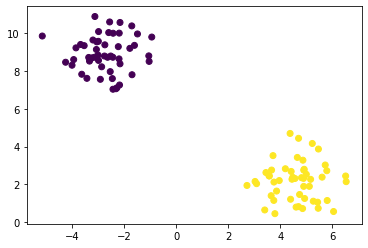

In [176]:
plt.scatter(X[:,0],X[:,1],c=y)

In [177]:
X.shape

(100, 2)

In [178]:
class coutom:
    def __init__(self,maxiter=10,lr=0.1):
        self.maxiter=maxiter
        self.lr=lr
        
    def fit(self,X,y):
        X=np.hstack([np.ones((X.shape[0],1)),X])
        
        self.theta=np.random.randn(X.shape[1],1)

        
        for i in range(self.maxiter):
            self.gradientassend(X,y)
            
    def gradientassend(self,X,y):
        delta_theta=self.gradient(X,y)
        self.theta+=delta_theta
        
    def gradient(self,X,y):
        y=y.reshape(-1,1)
        yp=self.hypo(X)
        diff=yp-y
        dlltheta=np.dot(X.T,diff)/len(X)
        #print(dlltheta)
        return -self.lr*dlltheta
    
        
    def hypo(self,X):
        g=np.dot(X,self.theta)

        hypo=1 /(1+np.exp(-g))
        #print(hypo)
        return hypo
    
    def predict(self,X):
        X=np.hstack([np.ones((X.shape[0],1)),X])
        result=self.hypo(X)
        #print(result)
        return (result>0.5).astype(int).flatten()
    
    def score(self,X,y):
        yp=self.predict(X)
        return (yp==y).mean()

In [179]:
a=coutom()

In [180]:
a.fit(X,y)

In [181]:
a.predict(X[:10])

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [182]:
y[:10]

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [183]:
a.score(X,y)

1.0

In [184]:
a.theta

array([[-0.34171506],
       [ 0.63096565],
       [-0.15122375]])

In [151]:
X,y=make_blobs(random_state=42,centers=3)

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
model=LogisticRegression()

In [154]:
model.fit(X,y)

C:\Users\Naman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Naman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
model.predict(X[:10])

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0])

In [156]:
y[:10]

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0])

In [157]:
model.score(X,y)

1.0

In [158]:
model.coef_

array([[-0.6048619 ,  0.87084832],
       [ 1.36873029, -0.28733353],
       [-0.72901307, -0.93425973]])

In [159]:
model.intercept_

array([-2.41964146,  0.12026132, -0.30437013])

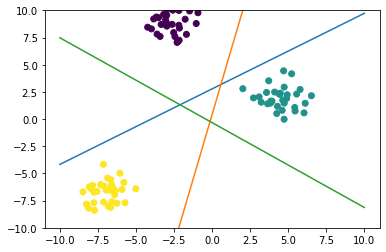

In [160]:
plt.scatter(X[:,0],X[:,1],c=y)
for (m1,m2),c in zip(model.coef_,model.intercept_):
    #print(c)
    x1=np.linspace(-10,10,100)
    x2=(-x1*m1)/m2 - (c/m2)
    plt.ylim(-10,10)
    #print("hello")
    plt.plot(x1,x2)

In [161]:
x2=(-x1/m1)/m2 - (c/m2)

In [350]:
X,y=make_blobs(random_state=42,centers=5)

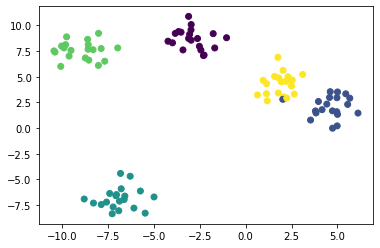

In [351]:
plt.scatter(X[:,0],X[:,1],c=y)

In [352]:
import numpy as np

In [353]:
class coutom1:
    def __init__(self,lr=1,maxstep=100):
        self.maxstep=maxstep
        self.lr=lr
        
    def fit(self,X,y):
        X=np.hstack([np.ones((X.shape[0],1)),X])
        self.classes=np.unique(y)
        
        thetas=[]
        for klas in self.classes:
            y_mod=(y==klas).astype(int)
            theta=np.random.randn(X.shape[1],1)
            
            for i in range(self.maxstep):
                self.gradient_decent(X,y_mod,theta)
            thetas.append(theta)    
        print(thetas)
        self.thetas=np.hstack(thetas)
        print(self.thetas)
    def gradient_decent(self,X,y,theta):
        delta_theta=self.gradient(X,y,theta)
        theta+=delta_theta
        #print(theta)
        return theta
        
        
    def gradient(self,X,y,theta):
        y=y.reshape(-1,1)
        yp=self.hypo(X,theta)
        diff=yp-y
        #print(diff)
        dlltheta=np.dot(X.T,diff)/len(X)
        #print(dlltheta)
        return -self.lr*dlltheta
        
    def hypo(self,X,theta):
        g=np.dot(X,theta)
        dist=1/(1+np.exp(-g))
        #print(dist)
        return dist
    
    def predict(self,x):
        x=np.hstack([np.ones((x.shape[0],1)),x])
        result=self.hypo(x,self.thetas)
        return result.argmax(axis=1)
    
    def score(self,X,y):
        yp=self.predict(X)
        return (yp==y).mean()

In [354]:
a=coutom1()

In [355]:
a.fit(X,y)

[array([[-8.59140234],
       [ 0.11940123],
       [ 1.75495091]]), array([[-1.59034834],
       [ 2.63835269],
       [-1.76053102]]), array([[ 0.08142491],
       [-0.78156549],
       [-3.16954807]]), array([[-10.46892157],
       [ -1.26665421],
       [  0.38978274]]), array([[-3.27649834],
       [ 0.34139595],
       [-0.09010064]])]
[[ -8.59140234  -1.59034834   0.08142491 -10.46892157  -3.27649834]
 [  0.11940123   2.63835269  -0.78156549  -1.26665421   0.34139595]
 [  1.75495091  -1.76053102  -3.16954807   0.38978274  -0.09010064]]


In [356]:
a.thetas

array([[ -8.59140234,  -1.59034834,   0.08142491, -10.46892157,
         -3.27649834],
       [  0.11940123,   2.63835269,  -0.78156549,  -1.26665421,
          0.34139595],
       [  1.75495091,  -1.76053102,  -3.16954807,   0.38978274,
         -0.09010064]])

In [357]:
a.predict(X[:10])

array([2, 0, 0, 0, 3, 2, 1, 1, 1, 0], dtype=int64)

In [358]:
y[:10]

array([2, 4, 0, 4, 3, 2, 1, 1, 1, 0])

In [359]:
a.score(X,y)

0.72

In [360]:
a.thetas.shape

(3, 5)